In [292]:
# Hilfreicher Link: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [293]:
import pandas as pd

In [294]:
germany_pop_raw = pd.read_csv("./germany_population.csv")
germany_pop_raw

,Name,Code,Indicator,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Germany,DEU,"Population, total",SP.POP.TOTL,72814900,73377632,74025784,74714353,75318337,75963695,...,80645605,80982500,81686611,82348669,82657002,82905782,83092962,83160871,NaN,NaN


In [295]:
germany_cleared = germany_pop_raw.drop(['Name', 'Code', 'Indicator', 'Indicator_Code', '2021', 'Unnamed: 66'], axis=1)
germany_pop = germany_cleared.transpose()
germany_pop = germany_pop.iloc[20:]
germany_pop_train = germany_pop.iloc[:36]
germany_pop_test = germany_pop.iloc[36:]
print(germany_pop_train)
print(germany_pop_test)
#germany_pop_trans.index

             0
1980  78288576
1981  78407907
1982  78333366
1983  78128282
1984  77858685
1985  77684873
1986  77720436
1987  77839920
1988  78144619
1989  78751283
1990  79433029
1991  80013896
1992  80624598
1993  81156363
1994  81438348
1995  81678051
1996  81914831
1997  82034771
1998  82047195
1999  82100243
2000  82211508
2001  82349925
2002  82488495
2003  82534176
2004  82516260
2005  82469422
2006  82376451
2007  82266372
2008  82110097
2009  81902307
2010  81776930
2011  80274983
2012  80425823
2013  80645605
2014  80982500
2015  81686611
             0
2016  82348669
2017  82657002
2018  82905782
2019  83092962
2020  83160871


In [296]:
y = germany_pop.iloc[:,0]
X = y.index
y_train = germany_pop_train.iloc[:,0]
X_train = y_train.index
y_train = y_train.values
y_test = germany_pop_test.iloc[:,0]
X_test = y_test.index
y_test = y_test.values
print(X_train)
print(y_train)
print(X_test)
print(y_test)

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')
[78288576 78407907 78333366 78128282 77858685 77684873 77720436 77839920
 78144619 78751283 79433029 80013896 80624598 81156363 81438348 81678051
 81914831 82034771 82047195 82100243 82211508 82349925 82488495 82534176
 82516260 82469422 82376451 82266372 82110097 81902307 81776930 80274983
 80425823 80645605 80982500 81686611]
Index(['2016', '2017', '2018', '2019', '2020'], dtype='object')
[82348669 82657002 82905782 83092962 83160871]


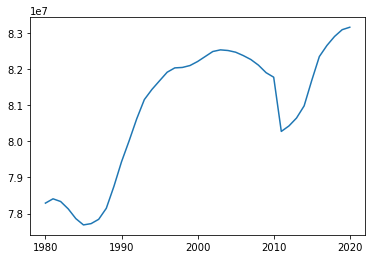

In [297]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks([0, 10, 20, 30, 40], ['1980', '1990', '2000', '2010', '2020'])
plt.plot(X, y)

In [298]:
def make_array(val: float, cnt: int=5):
    arr = []
    for i in range(0, cnt):
        arr.append(val)
    return arr

In [299]:
# naive
y_naive = y_train[len(y_train) - 1]
y_naive = make_array(y_naive)
print(y_naive)

[81686611, 81686611, 81686611, 81686611, 81686611]


In [300]:
# average
y_avg = y_train.mean()
print(type(y_avg))
y_avg = make_array(y_avg)
print(y_avg)

<class 'numpy.float64'>
[80628242.69444445, 80628242.69444445, 80628242.69444445, 80628242.69444445, 80628242.69444445]


In [301]:
# rwf
# make diff
y_diff = pd.DataFrame(y_train).diff().mean().values[0]
y_rwf = y_diff + y_train[len(y_train) - 1]
y_rwf = make_array(y_rwf)
print(y_rwf)

[81783697.71428572, 81783697.71428572, 81783697.71428572, 81783697.71428572, 81783697.71428572]


In [302]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [303]:
# Simple Exponential Smooting - SES
fit_ses = SimpleExpSmoothing(y_train, initialization_method="estimated").fit(smoothing_level=1.0, optimized=True)
y_ses = fit_ses.forecast(len(y_test))
print(y_ses)

[81686611. 81686611. 81686611. 81686611. 81686611.]


In [304]:
# Holt
fit_holt = Holt(y_train, initialization_method="heuristic").fit(smoothing_level=0.9, smoothing_trend=0.5, optimized=True)
y_holt = fit_holt.forecast(len(y_test))
print(y_holt)

[82037036.04090244 82449550.36563426 82862064.69036607 83274579.0150979
 83687093.33982971]


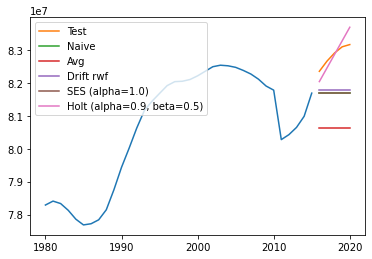

In [305]:
plt.figure()
plt.xticks([0, 10, 20, 30, 40], ['1980', '1990', '2000', '2010', '2020'])
plt.plot(X_train, y_train)
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, y_naive, label='Naive')
plt.plot(X_test, y_avg, label='Avg')
plt.plot(X_test, y_rwf, label='Drift rwf')
plt.plot(X_test, y_ses, label=f'SES (alpha={fit_ses.params["smoothing_level"]})')
plt.plot(X_test, y_holt, label=f'Holt (alpha={fit_holt.params["smoothing_level"]}, beta={fit_holt.params["smoothing_trend"]})')
plt.legend(loc="upper left")

In [306]:
from sklearn.metrics import mean_squared_error
print(f"MSE Naive: {mean_squared_error(y_test, y_naive):.4E}")
print(f"MSE Avg: {mean_squared_error(y_test, y_avg):.4E}")
print(f"MSE Drift rwf: {mean_squared_error(y_test, y_rwf):.4E}")
print(f"MSE SES: {mean_squared_error(y_test, y_ses):.4E}")
print(f"MSE Holt: {mean_squared_error(y_test, y_holt):.4E}")

MSE Naive: 1.4035E+12
MSE Avg: 4.9504E+12
MSE Drift rwf: 1.1903E+12
MSE SES: 1.4035E+12
MSE Holt: 9.0391E+10
